# Duck Lips v. Fish Gape Face


In [1]:
from fastai import *
from fastai.vision import *

Choose an appropriate name for your labeled images. You can run these steps multiple times to grab different labels.

In [5]:
folder = 'duck'
file = 'ducklipsonfleek.txt'

In [12]:
folder = 'fish'
# file = 'fishgapeisthenewducklips.txt'
file = 'fishgapeselfie.txt'

You will need to run this line once per each category.

In [10]:
path = Path('data/faces')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

Finally, upload your urls file. You just need to press 'Upload' in your working directory and select your file, then click 'Upload' for each of the displayed files.

![uploaded file](images/download_images/upload.png)

## Download images

Now you will need to download you images from their respective urls.

fast.ai has a function that allows you to do just that. You just have to specify the urls filename and the destination folder and this function will download and save all images that can be opened. If they have some problem in being opened, they will not be saved.

Let's download our images! Notice you can choose a maximum number of images to be downloaded. In this case we will not download all the urls.

You will need to run this line once for every category.

In [4]:
classes = ['duck','fish']

In [13]:
download_images(path/file, dest, max_pics=550)

In [ ]:
# If you have problems download, try with `max_workers=0` to see exceptions:
# download_images(path/file, dest, max_pics=20, max_workers=0)

Then we can remove any images that can't be opened:

In [14]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_workers=8)

duck


cannot identify image file '/home/jupyter/course-v3/nbs/dl1/data/faces/duck/00000137.jpg'
cannot identify image file '/home/jupyter/course-v3/nbs/dl1/data/faces/duck/00000485.jpg'
cannot identify image file '/home/jupyter/course-v3/nbs/dl1/data/faces/duck/00000276.jpg'
cannot identify image file '/home/jupyter/course-v3/nbs/dl1/data/faces/duck/00000414.jpg'
cannot identify image file '/home/jupyter/course-v3/nbs/dl1/data/faces/duck/00000346.jpg'
cannot identify image file '/home/jupyter/course-v3/nbs/dl1/data/faces/duck/00000071.jpg'
cannot identify image file '/home/jupyter/course-v3/nbs/dl1/data/faces/duck/00000208.jpg'
[Errno 21] Is a directory: '/home/jupyter/course-v3/nbs/dl1/data/faces/duck/.ipynb_checkpoints'
fish


cannot identify image file '/home/jupyter/course-v3/nbs/dl1/data/faces/fish/00000069.jpg'
cannot identify image file '/home/jupyter/course-v3/nbs/dl1/data/faces/fish/00000137.jpg'
cannot identify image file '/home/jupyter/course-v3/nbs/dl1/data/faces/fish/00000206.jpg'


## View data

In [15]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

Good! Let's take a look at some of our pictures then.

In [16]:
data.classes

['duck', 'fish']

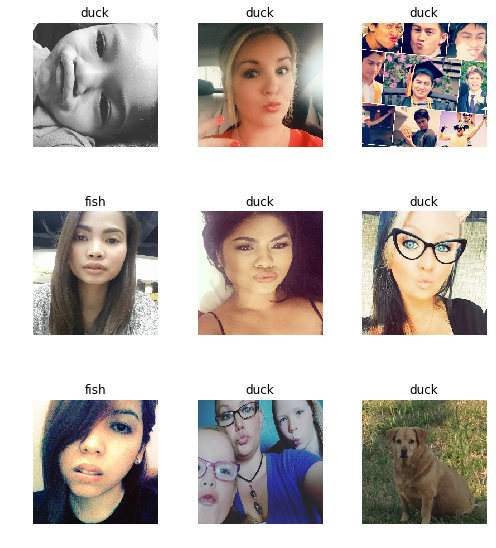

In [18]:
data.show_batch(rows=3, figsize=(7,8))

In [19]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['duck', 'fish'], 2, 573, 169)

## Train model

In [24]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

In [25]:
learn.fit_one_cycle(4)

Total time: 00:45
epoch  train_loss  valid_loss  error_rate
1      0.950871    0.533754    0.272189    (00:11)
2      0.793528    0.624907    0.313609    (00:11)
3      0.684939    0.655427    0.301775    (00:11)
4      0.625762    0.637562    0.301775    (00:11)



In [26]:
learn.save('duck-stage-1')

In [31]:
learn.load('duck-stage-1')

In [32]:
learn.unfreeze()

In [33]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


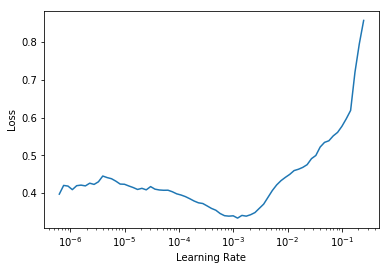

In [34]:
learn.recorder.plot()

In [35]:
learn.fit_one_cycle(2, max_lr=slice(3e-4,3e-3))

Total time: 00:22
epoch  train_loss  valid_loss  error_rate
1      0.571721    1.450613    0.396450    (00:11)
2      0.524660    0.813155    0.254438    (00:11)



In [36]:
learn.save('duck-stage-2')

In [37]:
learn.fit_one_cycle(1, max_lr=slice(3e-4,3e-3))

Total time: 00:11
epoch  train_loss  valid_loss  error_rate
1      0.570745    1.271621    0.260355    (00:11)



## Interpretation

In [38]:
learn.load('duck-stage-2')

In [39]:
interp = ClassificationInterpretation.from_learner(learn)

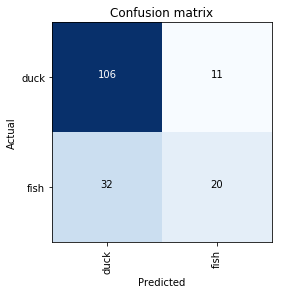

In [40]:
interp.plot_confusion_matrix()

FileNotFoundError: [Errno 2] No such file or directory: '/home/jupyter/course-v3/nbs/dl1/data/faces/fish/00000202.jpg'

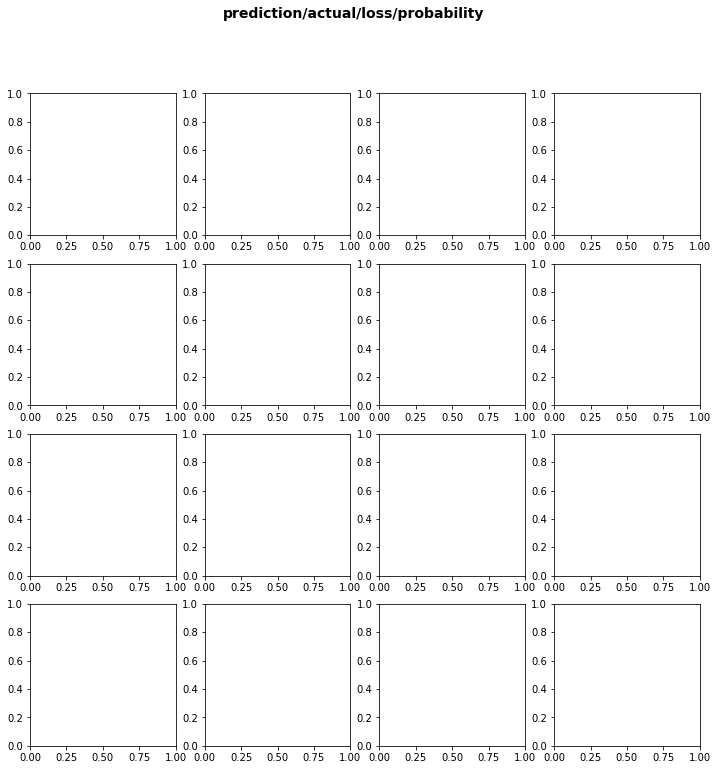

In [46]:
interp.plot_top_losses(16)

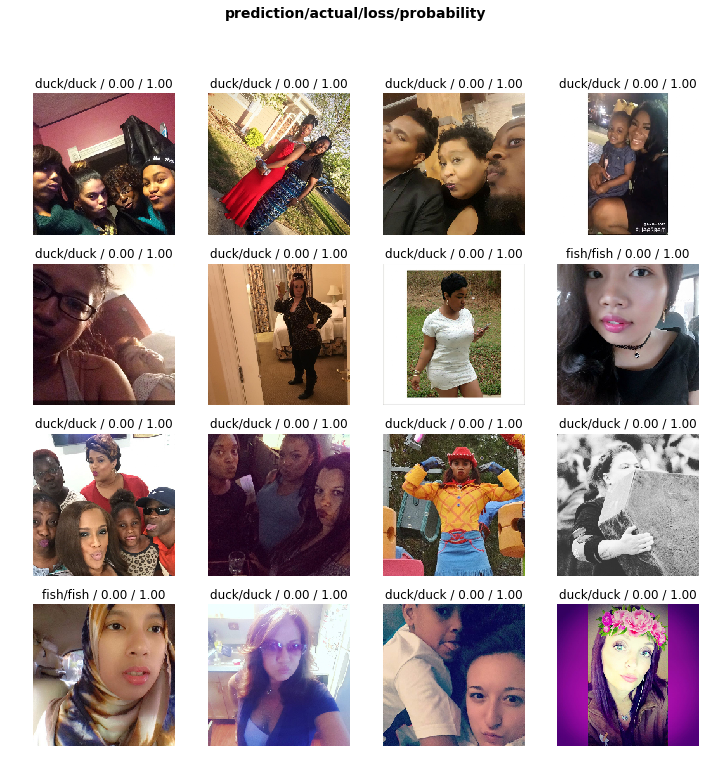

In [43]:
interp.plot_top_losses(16, largest=False)

## Cleaning Up

Some of our top losses aren't due to bad performance by our model. There are images in our data set that shouldn't be.

Using the `FileDeleter` widget from `fastai.widgets` we can prune our top losses, removing photos that don't belong.

First we need to get the file paths from our top_losses. Here's a handy function that pulls out all our top_losses:

In [47]:
from fastai.widgets import *

losses,idxs = interp.top_losses()
top_loss_paths = data.train_ds.x[idxs]

Now we can pass in these paths to our widget.

In [48]:
fd = FileDeleter(file_paths=top_loss_paths)

'No images to show :)'

Flag photos for deletion by clicking 'Delete'. Then click 'Confirm' to delete flagged photos and keep the rest in that row. The `File_Deleter` will show you a new row of images until there are no more to show. In this case, the widget will show you images until there are none left from `top_losses`.

## Try again after cleaning

In [51]:
data2 = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

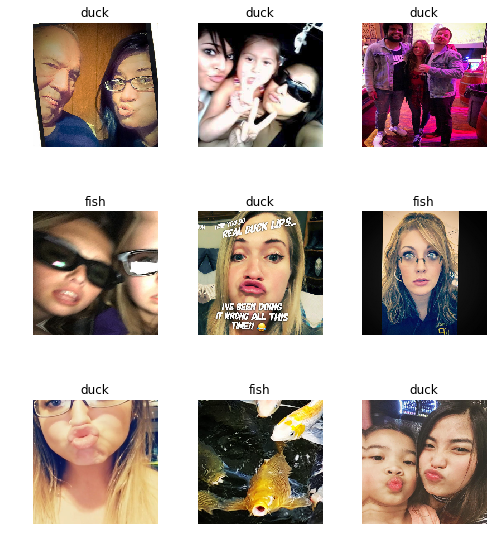

In [58]:
data2.show_batch(rows=3, figsize=(7,8))

In [52]:
learn2 = create_cnn(data2, models.resnet34, metrics=error_rate)

In [54]:
learn2.fit_one_cycle(4)

Total time: 00:39
epoch  train_loss  valid_loss  error_rate
1      0.897909    0.791812    0.438017    (00:09)
2      0.768743    0.784414    0.355372    (00:09)
3      0.695861    0.726757    0.305785    (00:09)
4      0.619871    0.713320    0.297521    (00:10)



In [55]:
learn2.save('duck-post-clean-stage-1')

In [56]:
learn2.fit_one_cycle(1)

Total time: 00:09
epoch  train_loss  valid_loss  error_rate
1      0.472403    0.734529    0.330579    (00:09)



In [60]:
learn2.load('duck-post-clean-stage-1')

In [61]:
learn2.unfreeze()

In [62]:
learn2.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


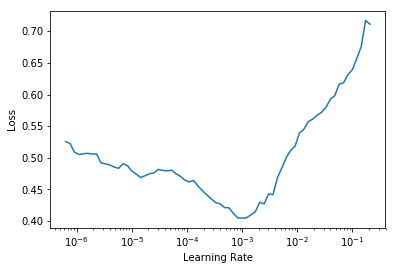

In [65]:
learn2.recorder.plot()

In [66]:
learn2.fit_one_cycle(2, max_lr=slice(3e-4,3e-3))

Total time: 00:19
epoch  train_loss  valid_loss  error_rate
1      0.712095    1.371406    0.404959    (00:09)
2      0.670444    1.048831    0.322314    (00:09)



In [67]:
learn2.fit_one_cycle(1, max_lr=slice(3e-4,3e-3))

Total time: 00:09
epoch  train_loss  valid_loss  error_rate
1      0.517606    1.899974    0.322314    (00:09)



In [68]:
learn2.fit_one_cycle(1, max_lr=slice(3e-4,3e-3))

Total time: 00:10
epoch  train_loss  valid_loss  error_rate
1      0.582712    1.706984    0.239669    (00:10)



In [69]:
learn2.save('duck-post-clean-stage-2')

In [70]:
learn2.fit_one_cycle(1, max_lr=slice(3e-4,3e-3))

Total time: 00:09
epoch  train_loss  valid_loss  error_rate
1      0.430391    1.226638    0.338843    (00:09)



In [75]:
learn2.load('duck-post-clean-stage-2')

In [76]:
interp2 = ClassificationInterpretation.from_learner(learn2)

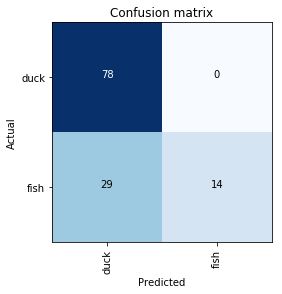

In [77]:
interp2.plot_confusion_matrix()

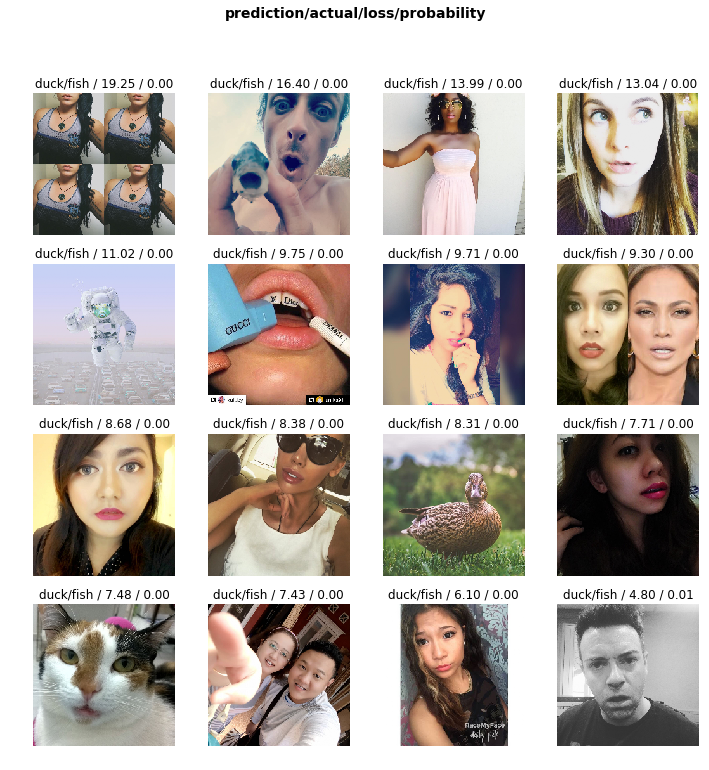

In [78]:
interp2.plot_top_losses(16)

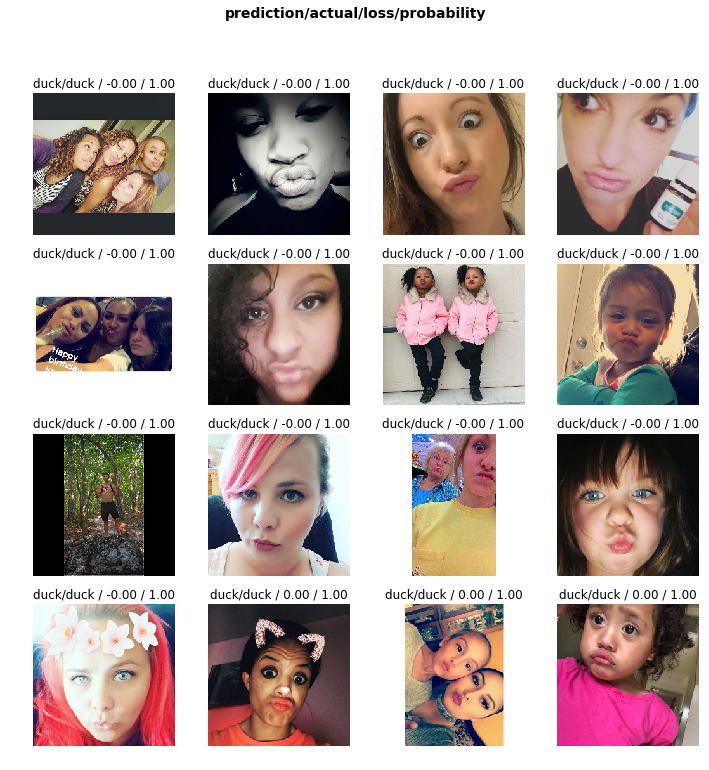

In [79]:
interp2.plot_top_losses(16, largest=False)